In [72]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

In [33]:
!dir

 Volume in drive E is SSD volume
 Volume Serial Number is FA50-0540

 Directory of E:\ImportantDocBackup\UOM Assignments\Semester 4\machine_vision\Excercise 3

02/23/2022  12:58 PM    <DIR>          .
02/23/2022  12:58 PM    <DIR>          ..
02/23/2022  12:11 PM    <DIR>          .ipynb_checkpoints
02/23/2022  12:19 PM           734,282 190071B_.ipynb
02/23/2022  12:11 PM         1,570,197 Book1.ipynb
02/23/2022  12:18 PM           141,467 butterfly.jpg
02/23/2022  12:18 PM           872,584 contact_lens.tif
02/23/2022  12:58 PM           303,655 Exercise 3.ipynb
02/23/2022  12:18 PM            63,116 tom.jpg
               6 File(s)      3,685,301 bytes
               3 Dir(s)  187,871,961,088 bytes free


## Question 1

In [34]:
img = cv.imread(r'butterfly.jpg', cv.IMREAD_REDUCED_GRAYSCALE_4)
assert img is not None

k_size = 9
sigma = 4

box_kernel = 1./81*np.ones((9,9))

img_average = cv.filter2D(img, -1, box_kernel)
img_gaussian = cv.GaussianBlur(img, (k_size,k_size), sigma)

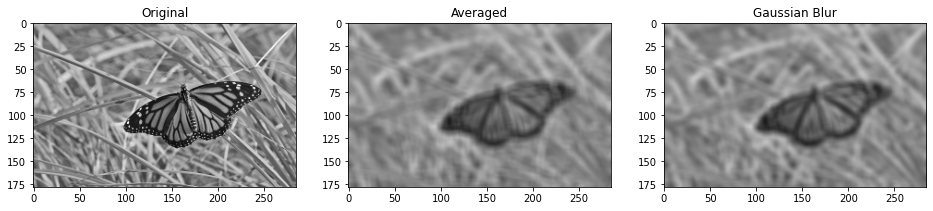

In [35]:
# do color convertion
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

_, ax = plt.subplots(1, 3, figsize=(16, 6))

ax[0].set_title("Original")
ax[0].imshow(img, cmap='gray', vmin=0, vmax=255)

ax[1].set_title("Averaged")
ax[1].imshow(img_average, cmap='gray', vmin=0, vmax=255)

ax[2].set_title("Gaussian Blur")
ax[2].imshow(img_gaussian, cmap='gray', vmin=0, vmax=255)

plt.show()

## Question 3

In [42]:
img = cv.imread(r'contact_lens.tif', cv.IMREAD_GRAYSCALE).astype('float32')
assert img is not None

sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype='float32')
sobel_h = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype='float32')

img_x = cv.filter2D(img, -1, sobel_v)
img_y = cv.filter2D(img, -1, sobel_h)

grad_mag = np.sqrt(img_x ** 2 + img_y ** 2)

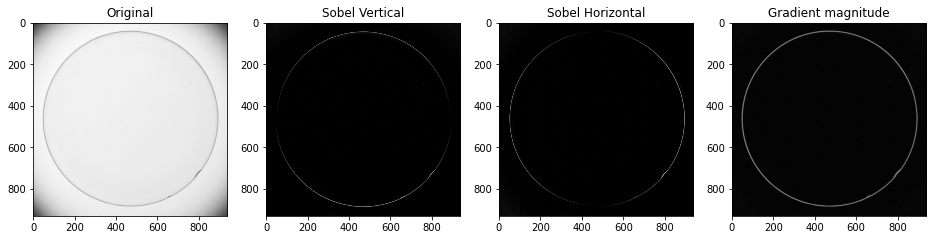

In [44]:
_, ax = plt.subplots(1, 4, figsize=(16, 6))

ax[0].set_title("Original")
ax[0].imshow(img, cmap='gray', vmin=0, vmax=255)

ax[1].set_title("Sobel Vertical")
ax[1].imshow(img_x, cmap='gray', vmin=0, vmax=255)

ax[2].set_title("Sobel Horizontal")
ax[2].imshow(img_y, cmap='gray', vmin=0, vmax=255)

ax[3].set_title("Gradient magnitude")
ax[3].imshow(grad_mag, cmap='gray')

plt.show()

## Question 4

In [67]:
img = cv.imread(r'tom.jpg', cv.IMREAD_GRAYSCALE).astype('float32')
assert img is not None

sigma = 2

kernel = cv.getGaussianKernel(5, sigma)

img_lowpass = cv.sepFilter2D(img, -1, kernel, kernel)
img_highpass = img - img_lowpass

img_sharpened = cv.addWeighted(img, 1.0, img_highpass, 2.0, 0)

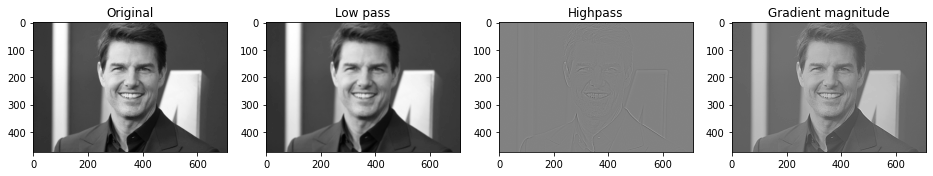

In [68]:
_, ax = plt.subplots(1, 4, figsize=(16, 6))

ax[0].set_title("Original")
ax[0].imshow(img, cmap='gray')

ax[1].set_title("Low pass")
ax[1].imshow(img_lowpass, cmap='gray')

ax[2].set_title("Highpass")
ax[2].imshow(img_highpass, cmap='gray')

ax[3].set_title("Gradient magnitude")
ax[3].imshow(img_sharpened, cmap='gray')

plt.show()

## Question 2

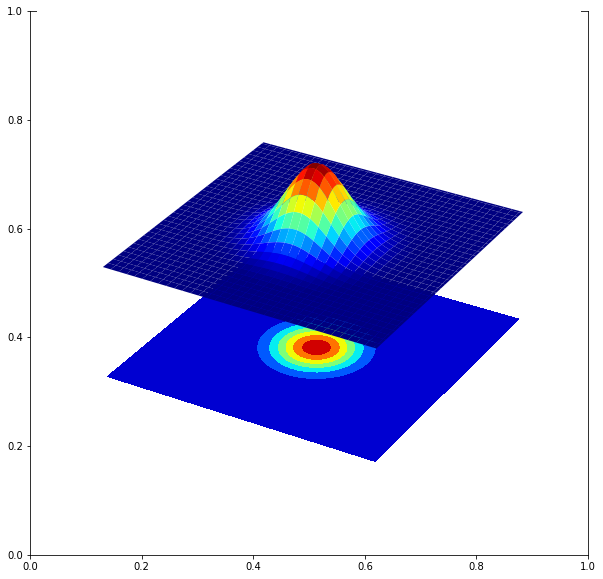

In [79]:
fig , ax = plt.subplots(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')

step = 0.1
sigma = 1

X = np.arange(-5, 5 + step, step)
Y = np.arange(-5, 5 + step, step)

XX, YY = np.meshgrid(X, Y)

g = np.exp(-(XX**2 + YY**2)/(2 * sigma ** 2))

surf = ax.plot_surface(XX, YY, g, cmap=cm.jet)
cset = ax.contourf(XX, YY, g, zdir='z', offset=np.min(g) - 1.5, cmap=cm.jet)

ax.set_zlim(np.min(g)-2, np.max(g))

plt.axis('off')
plt.show()

